## Spiro-Spiro Blastn Output

Threshold= 95% pi   &   >1000

count= 3773

In [1]:
blastn_file =("/opt/zeynep/spironucleus/spiro_spiro.blastn")
import pandas as pd

df=pd.read_csv(blastn_file, sep="\t", header=None)
df=df.drop(columns=[10,11,12,13,14])
df=df[(df[2]>95 )& (df[3]>1000)]
print(len(df))
df.head(10)

3773


,0,1,2,3,4,5,6,7,8,9
0,chr1,chr1,100.000,1924143,0,0,1,1924143,1,1924143
1,chr1,chr1,97.042,11631,317,22,19902,31520,8996,20611
2,chr1,chr1,97.042,11631,317,22,8996,20611,19902,31520
3,chr1,chr1,99.685,10796,34,0,1081551,1092346,1079671,1068876
4,chr1,chr1,99.685,10796,34,0,1068876,1079671,1092346,1081551
5,chr1,chr1,97.647,10923,231,19,34932,45838,20253,31165
6,chr1,chr1,97.647,10923,231,19,20253,31165,34932,45838
7,chr1,chr1,96.934,10925,306,25,34932,45838,9343,20256
8,chr1,chr1,96.934,10925,306,25,9343,20256,34932,45838
9,chr1,chr1,99.784,9259,19,1,1236980,1246238,1229538,1220281


## Self Match

### Self-match & same direction
count= 44

In [2]:
df1=df[df[6] == df[8]]
#df1=df[(df[4] == 0) & (df[5] == 0)]

print(len(df1))
df1.sample(20)

44


,0,1,2,3,4,5,6,7,8,9
83382,tig00000108,tig00000108,100.0,14210,0,0,1,14210,1,14210
82685,tig00000062,tig00000062,100.0,19636,0,0,1,19636,1,19636
79002,tig00000033,tig00000033,100.0,17080,0,0,1,17080,1,17080
73737,tig00000009,tig00000009,100.0,21399,0,0,1,21399,1,21399
76572,tig00000021,tig00000021,100.0,12343,0,0,1,12343,1,12343
82200,tig00000055,tig00000055,100.0,10273,0,0,1,10273,1,10273
0,chr1,chr1,100.0,1924143,0,0,1,1924143,1,1924143
83352,tig00000107,tig00000107,100.0,9347,0,0,1,9347,1,9347
31379,chr5,chr5,100.0,780939,0,0,951197,1732135,951197,1732135
73386,tig00000003,tig00000003,100.0,21273,0,0,1,21273,1,21273


## All matches - Self match


1) Charachterizing the matches; are they pair duplications or more then 2 copies? 

In [4]:
#All matches - Self match
def anti_join(x, y):
    """Return rows in x which are not present in y"""
    ans = pd.merge(left=x, right=y, how='left', indicator=True)
    ans = ans.loc[ans._merge == 'left_only', :].drop(columns='_merge')
    ans= ans.reset_index()
    return ans
print(len(anti_join(df, df1)))
df=anti_join(df, df1).drop(columns="index")
df.head(10)

3729


,0,1,2,3,4,5,6,7,8,9
0,chr1,chr1,97.042,11631,317,22,19902,31520,8996,20611
1,chr1,chr1,97.042,11631,317,22,8996,20611,19902,31520
2,chr1,chr1,99.685,10796,34,0,1081551,1092346,1079671,1068876
3,chr1,chr1,99.685,10796,34,0,1068876,1079671,1092346,1081551
4,chr1,chr1,97.647,10923,231,19,34932,45838,20253,31165
5,chr1,chr1,97.647,10923,231,19,20253,31165,34932,45838
6,chr1,chr1,96.934,10925,306,25,34932,45838,9343,20256
7,chr1,chr1,96.934,10925,306,25,9343,20256,34932,45838
8,chr1,chr1,99.784,9259,19,1,1236980,1246238,1229538,1220281
9,chr1,chr1,99.784,9259,19,1,1220281,1229538,1246238,1236980


## Group Matches by the number of occurences 2
Columns 6-7 and 8-9 has the same information thus, creates duplication

Consider only 6-7 and repeat the grouping

In [45]:
#count number of duplication occurences
cols=list(range(6))
df1 = df[df.duplicated(subset=cols,keep=False)].copy()
df1 = df1.sort_values(cols)
df1['group'] = 'g' + (df1.groupby(cols).ngroup() + 1).astype(str)
df1['duplicate_count'] = df1.groupby(cols)[2].transform('size')
print(len(df1))
df1.head(20)

2600


,0,1,2,3,4,5,6,7,8,9,group,duplicate_count
123,chr1,chr1,95.017,1746,74,11,44109,45847,30125,31864,g1,2
124,chr1,chr1,95.017,1746,74,11,30125,31864,44109,45847,g1,2
137,chr1,chr1,95.182,1515,66,6,46034,47544,18400,19911,g2,2
138,chr1,chr1,95.182,1515,66,6,18400,19911,46034,47544,g2,2
51,chr1,chr1,95.450,2835,85,9,913169,915992,911242,908441,g3,2
52,chr1,chr1,95.450,2835,85,9,908441,911242,915992,913169,g3,2
119,chr1,chr1,95.539,1726,69,7,44117,45838,32197,33918,g4,2
120,chr1,chr1,95.539,1726,69,7,32197,33918,44117,45838,g4,2
183,chr1,chr1,95.594,1044,42,3,33564,34605,29435,30476,g5,2
184,chr1,chr1,95.594,1044,42,3,29435,30476,33564,34605,g5,2


In [54]:
df2=df1[df1["duplicate_count"] >2]
df2

,0,1,2,3,4,5,6,7,8,9,group,duplicate_count
143,chr1,chr1,99.466,1312,7,0,1166704,1168015,1162546,1163857,g28,16
144,chr1,chr1,99.466,1312,7,0,1170370,1171681,1162546,1163857,g28,16
145,chr1,chr1,99.466,1312,7,0,1167274,1168585,1163809,1165120,g28,16
146,chr1,chr1,99.466,1312,7,0,1167844,1169155,1163809,1165120,g28,16
147,chr1,chr1,99.466,1312,7,0,1170940,1172251,1163809,1165120,g28,16
...,...,...,...,...,...,...,...,...,...,...,...,...
3518,tig00000057,chr3,99.857,1400,2,0,11858,13257,1526969,1525570,g1105,8
3519,tig00000057,chr3,99.857,1400,2,0,11858,13257,1545802,1544403,g1105,8
3520,tig00000057,chr3,99.857,1400,2,0,11858,13257,1547387,1545988,g1105,8
3521,tig00000057,chr3,99.857,1400,2,0,11858,13257,1548972,1547573,g1105,8


In [55]:
df2=df2.sort_values(by=list(range(10))).head(20)
df2
#df2=df2.sort_values(cols).head(10)

,0,1,2,3,4,5,6,7,8,9,group,duplicate_count
149,chr1,chr1,99.466,1312,7,0,1162546,1163857,1166704,1168015,g28,16
153,chr1,chr1,99.466,1312,7,0,1162546,1163857,1170370,1171681,g28,16
151,chr1,chr1,99.466,1312,7,0,1163809,1165120,1167274,1168585,g28,16
152,chr1,chr1,99.466,1312,7,0,1163809,1165120,1167844,1169155,g28,16
155,chr1,chr1,99.466,1312,7,0,1163809,1165120,1170940,1172251,g28,16
156,chr1,chr1,99.466,1312,7,0,1163809,1165120,1171510,1172821,g28,16
143,chr1,chr1,99.466,1312,7,0,1166704,1168015,1162546,1163857,g28,16
157,chr1,chr1,99.466,1312,7,0,1166704,1168015,1172650,1173961,g28,16
145,chr1,chr1,99.466,1312,7,0,1167274,1168585,1163809,1165120,g28,16
146,chr1,chr1,99.466,1312,7,0,1167844,1169155,1163809,1165120,g28,16


In [56]:
dc=df1.groupby("duplicate_count")
dc.first()

,0,1,2,3,4,5,6,7,8,9,group
duplicate_count,,,,,,,,,,,
2,chr1,chr1,95.017,1746,74,11,44109,45847,30125,31864,g1
3,chr1,chr7,96.609,1386,40,1,184774,186152,243897,245282,g73
4,chr1,chr1,99.543,1312,6,0,1168414,1169725,1166704,1168015,g33
5,chr3,tig00000057,99.811,1586,3,0,1548972,1550557,8220,6635,g352
6,chr1,chr1,99.512,1435,7,0,1165318,1166752,1163116,1164550,g30
8,chr1,chr1,99.941,1705,1,0,1166881,1168585,1162153,1163857,g66
10,chr9,chr9,99.531,2131,10,0,248771,250901,214871,217001,g992
12,chr9,chr9,99.859,2131,3,0,223362,225492,216834,218964,g1065
14,chr3,chr3,99.811,1586,3,0,1538999,1540584,1523799,1525384,g305


In [57]:
dc.count()

,0,1,2,3,4,5,6,7,8,9,group
duplicate_count,,,,,,,,,,,
2,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150
3,12,12,12,12,12,12,12,12,12,12,12
4,160,160,160,160,160,160,160,160,160,160,160
5,10,10,10,10,10,10,10,10,10,10,10
6,66,66,66,66,66,66,66,66,66,66,66
8,48,48,48,48,48,48,48,48,48,48,48
10,10,10,10,10,10,10,10,10,10,10,10
12,12,12,12,12,12,12,12,12,12,12,12
14,42,42,42,42,42,42,42,42,42,42,42


## PLOT: Number of Repeats in all matches of Blastn

<AxesSubplot:xlabel='duplicate_count'>

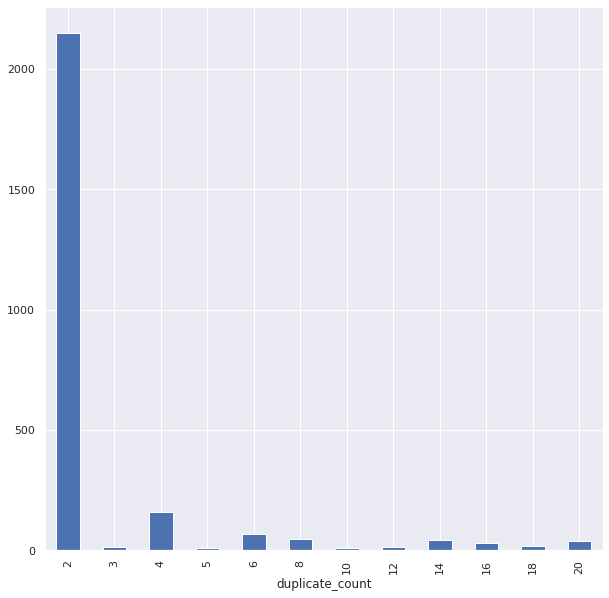

In [59]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pylab
sns.set(rc={'figure.figsize':(10,10)})
dc.size().plot(kind = 'bar')

## Example of a repeat

### get the hits with 2 occurences¶


In [60]:
dc_2=dc.get_group(2)
dc_2=dc_2.groupby([0,1,6,7])
dc_2.count()

2  3  4  5  8  9  group
0           1           6     7                             
chr1        chr1        8996  20611  1  1  1  1  1  1      1
                        9343  20256  1  1  1  1  1  1      1
                        18400 19911  1  1  1  1  1  1      1
                        19902 31520  1  1  1  1  1  1      1
                        20253 31165  1  1  1  1  1  1      1
...                                 .. .. .. .. .. ..    ...
tig00000062 tig00000062 8790  12616  1  1  1  1  1  1      1
                        9006  12616  1  1  1  1  1  1      1
                        9222  12616  1  1  1  1  1  1      1
                        9330  12616  1  1  1  1  1  1      1
                        10086 12616  1  1  1  1  1  1      1

[1828 rows x 7 columns]

In [62]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

dc_2.size().plot(kind = 'bar')

<AxesSubplot:xlabel='0,1,6,7'>

Error in callback <function flush_figures at 0x7f715fe8fc80> (for post_execute):


KeyboardInterrupt: 

In [204]:
dc_2.get_group(("chr1","chr1",34932,45838))

,0,1,2,3,4,5,6,7,8,9,group
6,chr1,chr1,96.934,10925,306,25,34932,45838,9343,20256,g9
4,chr1,chr1,97.647,10923,231,19,34932,45838,20253,31165,g12


### get the hits with 20 occurences¶

consider the first raw that has 4 repeats

compare indexes:

    3088,3089,3093,3043 location 6-7 matches with 8-9 in 4 different places
    

In [64]:
dc_20=dc.get_group(20)
dc_20=dc_20.groupby([0,1,6,7])
dc_20.count()

2  3  4  5  8  9  group
0    1    6      7                              
chr9 chr9 212482 214612  4  4  4  4  4  4      4
          214871 217001  1  1  1  1  1  1      1
          216834 218964  2  2  2  2  2  2      2
          219010 221140  4  4  4  4  4  4      4
          221186 223316  3  3  3  3  3  3      3
          229251 231381  1  1  1  1  1  1      1
          246808 248938  1  1  1  1  1  1      1
          248771 250901  1  1  1  1  1  1      1
          250947 253077  3  3  3  3  3  3      3
          254873 257003  1  1  1  1  1  1      1
          257049 259179  5  5  5  5  5  5      5
          263151 265281  1  1  1  1  1  1      1
          267076 269206  1  1  1  1  1  1      1
          269039 271169  1  1  1  1  1  1      1
          271002 273132  1  1  1  1  1  1      1
          272965 275095  2  2  2  2  2  2      2
          274928 277058  3  3  3  3  3  3      3
          276891 279021  3  3  3  3  3  3      3
          278854 280984  2  2  2  2  2  2      2

In [280]:
#pick the first example
dc_20.get_group(("chr9","chr9",212482,214612))

,0,1,2,3,4,5,6,7,8,9,group
3088,chr9,chr9,99.625,2131,8,0,212482,214612,272965,275095,g1009
3089,chr9,chr9,99.625,2131,8,0,212482,214612,274928,277058,g1009
3093,chr9,chr9,99.625,2131,8,0,212482,214612,278854,280984,g1009
3043,chr9,chr9,99.718,2131,6,0,212482,214612,276891,279021,g1036


In [65]:
#pick the second example
dc_20.get_group(("chr9","chr9",214871,217001))

,0,1,2,3,4,5,6,7,8,9,group
3087,chr9,chr9,99.625,2131,8,0,214871,217001,216834,218964,g1011


<AxesSubplot:xlabel='0,1,6,7'>

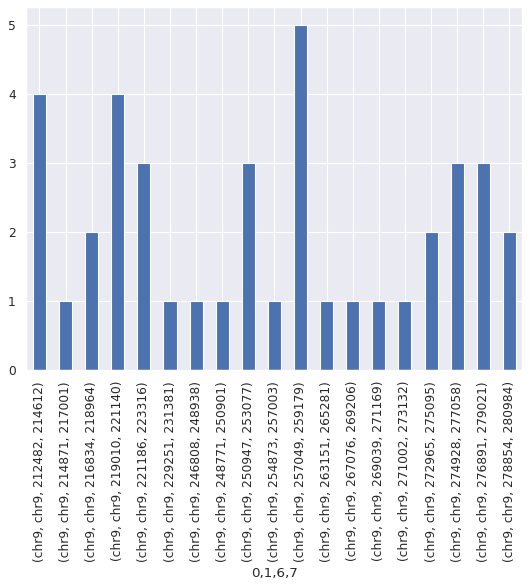

In [66]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

dc_20.size().plot(kind = 'bar')


## Plots for Repeats Overlook

### Within chromosome Matches

In [67]:
#count number of duplication occurences
cols=list(range(6))
dfw=df[df[0] == df[1]]
dfw = dfw[dfw.duplicated(subset=cols,keep=False)].copy()
dfw = dfw.sort_values(cols)
dfw['group'] = 'g' + (dfw.groupby(cols).ngroup() + 1).astype(str)
dfw['duplicate_count'] = dfw.groupby(cols)[2].transform('size')
print(len(dfw))
dfw.head(10)

2502


,0,1,2,3,4,5,6,7,8,9,group,duplicate_count
123,chr1,chr1,95.017,1746,74,11,44109,45847,30125,31864,g1,2
124,chr1,chr1,95.017,1746,74,11,30125,31864,44109,45847,g1,2
137,chr1,chr1,95.182,1515,66,6,46034,47544,18400,19911,g2,2
138,chr1,chr1,95.182,1515,66,6,18400,19911,46034,47544,g2,2
51,chr1,chr1,95.450,2835,85,9,913169,915992,911242,908441,g3,2
52,chr1,chr1,95.450,2835,85,9,908441,911242,915992,913169,g3,2
119,chr1,chr1,95.539,1726,69,7,44117,45838,32197,33918,g4,2
120,chr1,chr1,95.539,1726,69,7,32197,33918,44117,45838,g4,2
183,chr1,chr1,95.594,1044,42,3,33564,34605,29435,30476,g5,2
184,chr1,chr1,95.594,1044,42,3,29435,30476,33564,34605,g5,2


In [68]:
dcw=dfw.groupby("duplicate_count")
dcw.first()


,0,1,2,3,4,5,6,7,8,9,group
duplicate_count,,,,,,,,,,,
2,chr1,chr1,95.017,1746,74,11,44109,45847,30125,31864,g1
4,chr1,chr1,99.543,1312,6,0,1168414,1169725,1166704,1168015,g33
6,chr1,chr1,99.512,1435,7,0,1165318,1166752,1163116,1164550,g30
8,chr1,chr1,99.941,1705,1,0,1166881,1168585,1162153,1163857,g66
10,chr9,chr9,99.531,2131,10,0,248771,250901,214871,217001,g967
12,chr9,chr9,99.859,2131,3,0,223362,225492,216834,218964,g1040
14,chr3,chr3,99.811,1586,3,0,1538999,1540584,1523799,1525384,g304
16,chr1,chr1,99.466,1312,7,0,1166704,1168015,1162546,1163857,g28
18,chr9,chr9,99.672,2131,7,0,267076,269206,212482,214612,g1003


<AxesSubplot:xlabel='duplicate_count'>

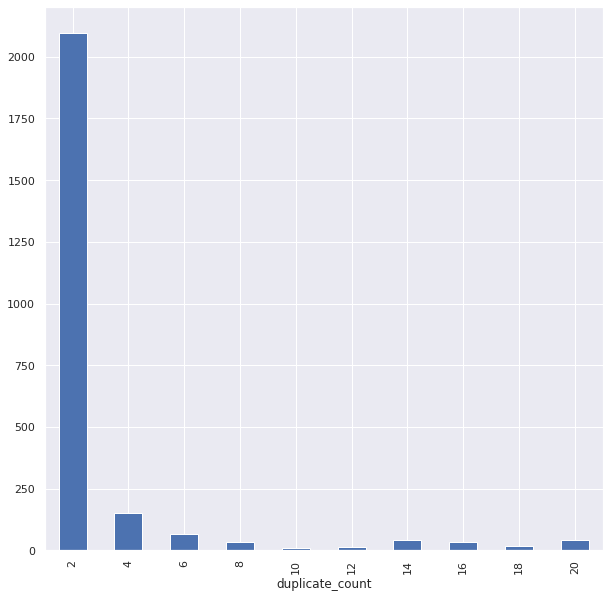

In [69]:
dcw.size().plot(kind = 'bar')

### Across chromosome Matches

In [70]:
#count number of duplication occurences
cols=list(range(6))
dfa=df[df[0] != df[1]]
dfa = dfa[dfa.duplicated(subset=cols,keep=False)].copy()
dfa = dfa.sort_values(cols)
dfa['group'] = 'g' + (dfa.groupby(cols).ngroup() + 1).astype(str)
dfa['duplicate_count'] = dfa.groupby(cols)[2].transform('size')
print(len(dfa))
dfa.head(10)

98


,0,1,2,3,4,5,6,7,8,9,group,duplicate_count
196,chr1,chr7,96.609,1386,40,1,184774,186152,243897,245282,g1,3
197,chr1,chr7,96.609,1386,40,1,203957,205335,245282,243897,g1,3
198,chr1,chr7,96.609,1386,40,1,193371,194749,245282,243897,g1,3
1165,chr3,chr5,95.490,1020,41,4,62394,63409,1692887,1691869,g2,2
1166,chr3,chr5,95.490,1020,41,4,62394,63409,1704098,1703080,g2,2
1062,chr3,chr5,95.538,1367,52,7,66120,67482,1692887,1691526,g3,2
1064,chr3,chr5,95.538,1367,52,7,54586,55947,1721011,1719649,g3,2
1125,chr3,chr5,96.267,1018,36,2,62394,63409,1706465,1705448,g4,2
1126,chr3,chr5,96.267,1018,36,2,78048,79065,1709508,1708493,g4,2
930,chr3,tig00000057,99.560,1136,5,0,1552142,1553277,2997,1862,g5,2


In [71]:
dca=dfa.groupby("duplicate_count")
dca.first()


,0,1,2,3,4,5,6,7,8,9,group
duplicate_count,,,,,,,,,,,
2,chr3,chr5,95.490,1020,41,4,62394,63409,1692887,1691869,g2
3,chr1,chr7,96.609,1386,40,1,184774,186152,243897,245282,g1
4,chr4,tig00000001,95.625,1600,52,8,968322,969914,13962,15550,g14
5,chr3,tig00000057,99.811,1586,3,0,1548972,1550557,8220,6635,g8
8,chr3,tig00000057,99.857,1400,2,0,1517179,1518578,2811,1412,g10


<AxesSubplot:xlabel='duplicate_count'>

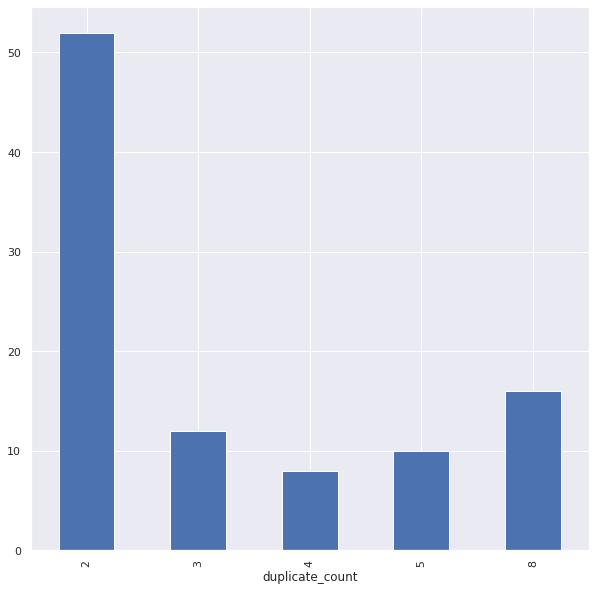

In [72]:
dca.size().plot(kind = 'bar')